In [10]:
from tensorflow import keras
import seaborn as sns
import pandas as pd

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [5]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Dropout(0.8)(x) # This is new!
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

model_dropout.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 50)          

In [8]:
model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_dropout = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


2023-03-08 15:27:53.523078: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 3s 15ms/step - loss: 2.2098 - accuracy: 0.1614 - val_loss: 2.0335 - val_accuracy: 0.2151
Epoch 2/20
157/157 [==============================] - 2s 14ms/step - loss: 2.0199 - accuracy: 0.2328 - val_loss: 1.9184 - val_accuracy: 0.2661
Epoch 3/20
157/157 [==============================] - 2s 15ms/step - loss: 1.8933 - accuracy: 0.2730 - val_loss: 1.7711 - val_accuracy: 0.3381
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: 1.8119 - accuracy: 0.3090 - val_loss: 1.8261 - val_accuracy: 0.3052
Epoch 5/20
157/157 [==============================] - 2s 15ms/step - loss: 1.7319 - accuracy: 0.3570 - val_loss: 1.7028 - val_accuracy: 0.3681
Epoch 6/20
157/157 [==============================] - 2s 15ms/step - loss: 1.6796 - accuracy: 0.3728 - val_loss: 1.5789 - val_accuracy: 0.4188
Epoch 7/20
157/157 [==============================] - 2s 16ms/step - loss: 1.6097 - accuracy: 0.3932 - val_loss: 1.5195 - val_accuracy: 0.4343
Epoch 8/20

313/313 - 1s - loss: 1.3102 - accuracy: 0.5195 - 1s/epoch - 5ms/step


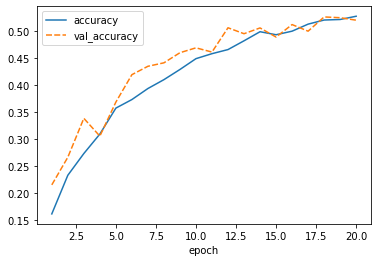

In [11]:
history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)

<AxesSubplot:xlabel='epoch'>

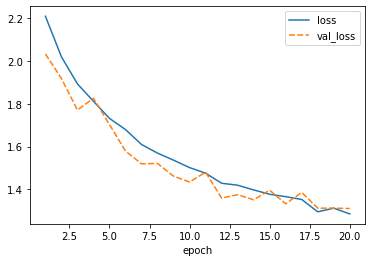

In [12]:
sns.lineplot(data=history_df[['loss', 'val_loss']])

In [39]:
dropout_rates = [0.15, 0.3, 0.45, 0.6, 0.75]
test_losses = []
for dropout_rate in dropout_rates:
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    
    model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

    model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

    test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels)
    test_losses.append(test_loss)
    

Epoch 1/20
157/157 [==============================] - 4s 22ms/step - loss: 2.1780 - accuracy: 0.1646 - val_loss: 2.0794 - val_accuracy: 0.2090
Epoch 2/20
157/157 [==============================] - 3s 20ms/step - loss: 1.8532 - accuracy: 0.3276 - val_loss: 1.7347 - val_accuracy: 0.3686
Epoch 3/20
157/157 [==============================] - 3s 21ms/step - loss: 1.6699 - accuracy: 0.3832 - val_loss: 1.7190 - val_accuracy: 0.3731
Epoch 4/20
157/157 [==============================] - 3s 22ms/step - loss: 1.5605 - accuracy: 0.4260 - val_loss: 1.6005 - val_accuracy: 0.4256
Epoch 5/20
157/157 [==============================] - 3s 22ms/step - loss: 1.4998 - accuracy: 0.4564 - val_loss: 1.6182 - val_accuracy: 0.4284
Epoch 6/20
157/157 [==============================] - 3s 22ms/step - loss: 1.4162 - accuracy: 0.4856 - val_loss: 1.4824 - val_accuracy: 0.4688
Epoch 7/20
157/157 [==============================] - 3s 22ms/step - loss: 1.3423 - accuracy: 0.5176 - val_loss: 1.4799 - val_accuracy: 0.4744

In [40]:
loss_df = pd.DataFrame({'dropout_rate': dropout_rates, 'test_loss': test_losses})

<AxesSubplot:xlabel='dropout_rate', ylabel='test_loss'>

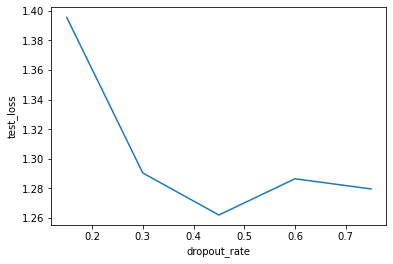

In [41]:
sns.lineplot(data=loss_df, x='dropout_rate', y='test_loss')